# Heart Failure Prediction

# Context:

* ***Source:*** This analysis utilizes a dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
* ***Objective:*** Develop a predictive model to accurately identify heart disease using the features available in the dataset

For the context of my analysis, I have chosen to focus on heart failure prediction. Cardiovascular diseases have become increasingly dangerous, claiming over 17 million lives each year. Heart failure, often a consequence of these diseases, is a common occurrence. The dataset I am working with comprises 918 observations and 12 attributes.

Given the urgency of cardiovascular health, early detection and management are paramount for individuals at risk. Factors like hypertension, diabetes, hyperlipidemia, or pre-existing conditions heighten the risk.

# Approaching:

In this analysis, the objective is to construct a robust predictive model and evaluate its performance. The following steps outline the methodology employed in this portfolio:

**1. Importing Dataset and Initial Exploration:** The process begins with importing the dataset and conducting exploratory analysis. This includes assessing for missing values and examining data types, with encoding performed as necessary to prepare the data for modeling.

**2. Correlation Testing:** Correlation analysis is conducted to understand the relationships between different variables, particularly focusing on their associations with Heart Disease.

**3. Data Splitting for Training and Testing:** The dataset is divided into training and testing sets to facilitate model training and evaluation.

**4. Logistic Regression:** Initially, a logistic regression model is implemented using all features, followed by Recursive Feature Elimination (RFE) to identify the most significant predictors.

**5. K-Nearest Neighbors (KNN):** A KNN algorithm is applied to the dataset to further explore its predictive capabilities.

**6. Hyperparameter Tuning:** The optimal K value for the KNN algorithm is determined through hyperparameter tuning, aiming to maximize the accuracy score.

**7. Model Evaluation:** The performance of the constructed models is evaluated based on confusion matrix and classification report.

Through these systematic steps, the analysis endeavors to develop a reliable predictive model for heart disease while ensuring a thorough assessment of its effectiveness and reliability.

# Attributes information:

|Attributes|Meaning|
|:-----:|:-----:|
|Age|age of the patient|
|Sex|sex of the patient|
|Chest Pain Type|chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]|
|RestingBP|resting blood pressure [mm Hg]|
|Cholesterol|serum cholesterol [mm/dl]|
|FastingBS|fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]|
|RestingECG|resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
|
|MaxHR|maximum heart rate achieved [Numeric value between 60 and 202]|
|Exercise Angina|exercise-induced angina [Y: Yes, N: No]|
|Oldpeak|oldpeak = ST [Numeric value measured in depression]|
|ST_Slope|the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]|
|Heart Disease|output class [0: Normal, 1: heart disease]|

# Import important library:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder # for encode the categorical features
from sklearn.model_selection import train_test_split # for splitting the data

from sklearn.linear_model import LogisticRegression # for creating Logistic Regression model
from sklearn.feature_selection import RFE # for selecting the most significant features

from sklearn.neighbors import KNeighborsClassifier # for creating KNN model
from sklearn.model_selection import GridSearchCV # hyper parameter to select significant features

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report 

import warnings
warnings.filterwarnings('ignore')

# 1. Importing Dataset and Initial Exploration:

In [3]:
# Import and read the CSV file
ds = "heart.csv"
df = pd.read_csv(ds)

print("The length of the data before removing missing data is :",len(df))
print (f"There are {df.shape[0]} rows in the dataset and {df.shape[1]} features.")

The length of the data before removing missing data is : 918
There are 918 rows in the dataset and 12 features.


In [4]:
# Counting the missing data in the dataset
null_counts = df.isnull().sum()

print("\nNumber of Null values in each column:")

print(null_counts)


Number of Null values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Overview of the dataset:

The dataset under analysis consists of 918 observations, each described by 12 distinct features. Notably, this dataset is complete with no missing values, ensuring that each of the 918 cases can be utilized fully in any subsequent analysis or model development

# Explore dataset:

In [5]:
# Get the information of types of values in the data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Get descriptive analysis (mean, median, range, std)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# To proceed with deeper analysis, it's crucial to convert categorical features into numerical values
# There are 5 attributes defined earlier with categorical values. The following code will encode them accordingly

enc = OrdinalEncoder(dtype=int)
df[["Sex","ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]]=enc.fit_transform(df[["Sex","ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


Regarding categorical variables, there are 5 attributes that need encoding for further analysis: "Sex," "ChestPainType," "RestingECG," "ExerciseAngina," and "ST_Slope."

In terms of overall descriptive statistics, the average age of observations is approximately 53 years old, with a standard deviation of around 9.4 years old. Resting blood pressure ranges from 0 to 200 mmHg, with a median of 130 mmHg. Additionally, the average cholesterol level among the survey respondents is 223 mm/dl.

# 2. Correlation Testing:

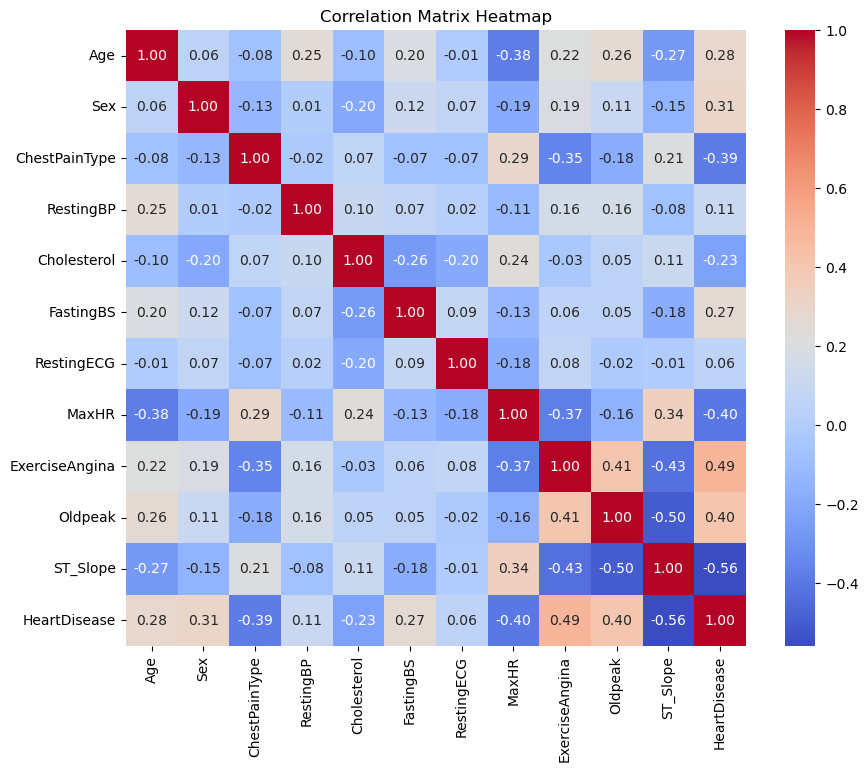

In [8]:
# Get the correlation coefficient between features in the data set
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add a title (optional)
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()



Heart Disease shows the highest correlation with Exercise Included Angina, Oldpeak, and ST_Slope, with correlation coefficients of 0.49, 0.4, and -0.56 respectively. Conversely, Resting ECG and Resting BP features exhibit the lowest correlation with Heart Disease.

# 3. Split the data:

In [9]:
# Split the data into training set and testing set
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
                                    # 20% of dataset for testing and 80% for training
print(train.shape)
print(test.shape)

(734, 12)
(184, 12)


# 4. Logistic Regression:

Using a logistic regression model for predicting the variable "Heart disease" is suitable because it is designed for binary outcomes, like whether someone has the disease or not. This model works by figuring out the chance of someone having the disease based on different factors. Since "Heart disease" has two possible outcomes and we want clear results, logistic regression is the most suitable for heart failure prediction.

In [10]:
# Getting input data and targets:
# For training set:
X_train = train. drop(['HeartDisease'], axis = 1 ) # for predictor, drop the 'price_range' from the dataset
y_train = train['HeartDisease']

# For testing set
X_test = test.drop(['HeartDisease'],  axis =  1 )
y_test= test['HeartDisease']

In [11]:
# Create the model with logistic regression:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Predictions for 'Heart Disease':
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print("Accuracy score on training set: ", accuracy_score(y_train, y_train_predict))
print("Accuracy score on testing set: ", accuracy_score(y_test,y_test_predict))

Accuracy score on training set:  0.8583106267029973
Accuracy score on testing set:  0.842391304347826


# Use RFE to select the most significant features:

The following step is applying ***Recursive Feature Elimination (RFE)*** to select the most significant features for the logistic regression model. RFE systematically evaluates the importance of each feature by repeatedly fitting the model and eliminating the least important features until the optimal subset is identified. This process helps improve model performance by focusing on the most relevant predictors, reducing overfitting, and enhancing interpretability. By selecting the most informative features, RFE streamlines the model, making it more efficient and effective in accurately predicting heart disease.

In [13]:
# Define the testing set accuracy score with increasing features count:
acc_scores = []
for i in range (1,df.shape[1]): # with features from the dataset
    clf = LogisticRegression()
    rfe = RFE(estimator  = clf, n_features_to_select = i)
    
    # training model
    rfe.fit(X_train,y_train)
    
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    print  ("Acc on test set using", i, "features : ", acc_score)
    acc_scores.append(acc_score)

Acc on test set using 1 features :  0.7989130434782609
Acc on test set using 2 features :  0.7934782608695652
Acc on test set using 3 features :  0.7989130434782609
Acc on test set using 4 features :  0.8043478260869565
Acc on test set using 5 features :  0.8586956521739131
Acc on test set using 6 features :  0.842391304347826
Acc on test set using 7 features :  0.842391304347826
Acc on test set using 8 features :  0.8478260869565217
Acc on test set using 9 features :  0.8478260869565217
Acc on test set using 10 features :  0.8369565217391305
Acc on test set using 11 features :  0.842391304347826


In [14]:
# Create RFE model and select attributes
rfe = RFE(estimator=model, n_features_to_select = 5 , step = 1)

# Train the model
rfe.fit(X_train, y_train)

# Top 5 significant features
selected_features = np.array(train.drop(columns=['HeartDisease']).columns)[rfe.support_]
print("Top 5 significant Features:", selected_features)

Top 5 significant Features: ['Sex' 'ChestPainType' 'FastingBS' 'ExerciseAngina' 'ST_Slope']


In [15]:
# Reset the training and testing data (only take the significant features):
X_train, X_test, y_train, y_test = train_test_split(df[['Sex', 'ChestPainType', 'FastingBS' ,'ExerciseAngina', 'ST_Slope']], df['HeartDisease'], test_size=0.2, random_state=42)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (734, 5)
y_train: (734,)
X_test: (184, 5)
y_test: (184,)


In [16]:
# Train a new model on the reduced set of features
model_rfe = LogisticRegression()
model_rfe.fit(X_train, y_train)

# Prediction for 'Heart Disease'
y_pred_rfe = model_rfe.predict(X_test)

print("Accuracy (RFE Model):", accuracy_score(y_test, y_pred_rfe))

Accuracy (RFE Model): 0.8586956521739131


# 5. KNN model

After applying RFE, the next step involves implementing the K-Nearest Neighbors (KNN) algorithm. RFE helps identify the subset of features that contribute the most to the predictive power of the model, thereby reducing dimensionality and potentially improving model performance. By selecting only the most relevant features, RFE assists in creating a more focused and efficient input space for the subsequent KNN algorithm. KNN, on the other hand, makes predictions based on the similarity of features. By leveraging the reduced feature set obtained from RFE, the KNN model can effectively classify instances of heart disease based on their proximity to similar instances in the feature space. 

In [17]:
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [18]:
# Predict on the training set
y_train_pred = knn.predict(X_train)

# Predict on the test set
y_test_pred = knn.predict(X_test)

# Calculate and print the accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on the testing set:", test_accuracy)

Accuracy on the testing set: 0.8369565217391305


# 6. Hyper - parameter K:

Implementing hyperparameter tuning to determine the optimal value of K in the K-Nearest Neighbors (KNN) algorithm is a crucial step in refining the model's performance for predicting heart disease. By evaluating different values of K, ranging from small to large, hyperparameter tuning helps identify the K value that yields the highest accuracy score. This process ensures that the model is neither underfitting nor overfitting the training data, resulting in improved predictive power. Ultimately, selecting the best K value through hyperparameter tuning enhances the robustness and effectiveness of the KNN model in accurately classifying instances of heart disease.

In [19]:
# Define the range of K values to test
k_values = range(6, 35)

# Create a dictionary of hyperparameters to search
param_grid = {'n_neighbors': k_values}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

In [20]:
# Perform GridSearchCV to find the best K
grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the results of GridSearchCV
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score'] 
# mean_test_scores represents the mean accuracy score across all cross-validation folds on the testing portion of the data

In [21]:
# Get the best K value and its corresponding mean test score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print("Best K:", best_k)
print("Best Mean Accuracy:", best_score)

Best K: 21
Best Mean Accuracy: 0.8637219271270151


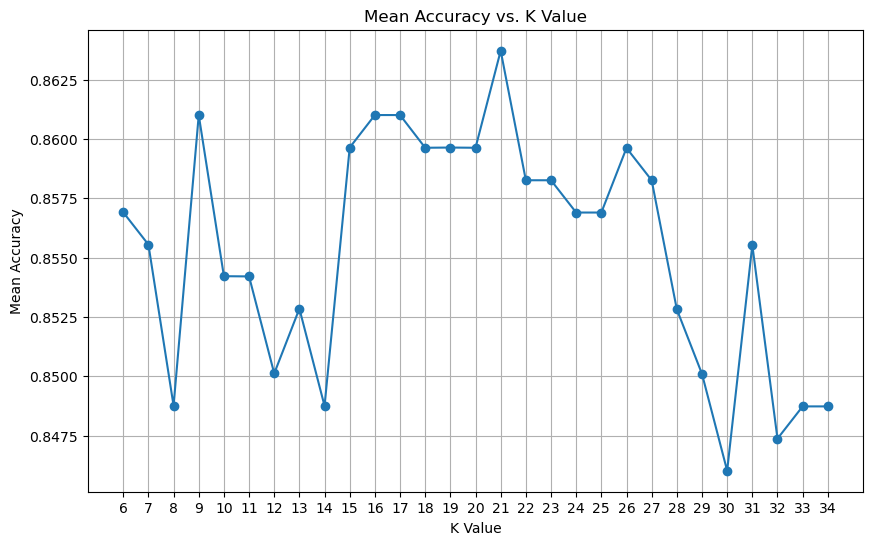

In [22]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

* The line graph demonstrates that the mean accuracy score generally improves as the value of K increases. Besides, the accuracy score peaks at around 0.8637 when K value equals 21. Notably, the accuracy begins to decline after reaching this peak. This indicates that excessively large values of K are not optimal for achieving high accuracy.

# 7. Evaluation evaluation:

# Confusion matrix

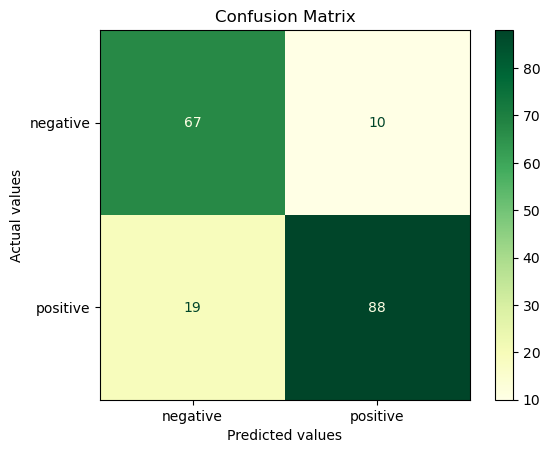

In [25]:
# Create Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "positive"])
disp.plot(cmap='YlGn')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

From the results of the confusion matrix of your model trained to predict heart disease, we can draw the following conclusions:

1. ***True Positives (TP)***: 88 values where the model correctly predicted the presence of heart disease.
2. ***True Negatives (TN)***: 67 instances where the model correctly predicted the absence of heart disease.
3. ***False Positives (FP)***: 10 instances where the model incorrectly predicted heart disease when it was not present.
4. ***False Negatives (FN)***: 19 instances where the model failed to detect heart disease when it was actually present.


Overall, the model demonstrates **strong performance** in identifying both the presence and absence of heart disease. However, it is important to address the **19 false negatives**, where the model failed to detect heart disease that was actually present. This oversight could lead to a lack of necessary medical treatment for affected individuals, potentially worsening their health outcomes. Additionally, the model generated **10 false positives**, where individuals without heart disease were incorrectly diagnosed as having it. This can cause unnecessary anxiety, stress, and lead to unnecessary medical interventions, which could burden patients both emotionally and financially. Both types of errors underscore **the need for further refinement** of the model to minimize misdiagnoses and ensure more accurate and reliable health care decisions.

# Classification report

In [26]:
# Create Classification report
print("Classification Report: \n", classification_report(y_test, y_pred_rfe))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        77
           1       0.92      0.83      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



The classification report for the heart disease prediction model provides a detailed view of its performance across key metrics—precision, recall, and f1-score—across two classes (0 representing absence (normal) and 1 representing presence of heart disease). Here’s an analysis and conclusion based on the provided data:

1. ***Precision and Recall***: 
* Class 0 (No Heart Disease): 79% of the predictions made by the model for class 0 were accurate. The recall of 0.90 for this class suggests that the model successfully identified 90% of all actual negatives (no heart disease), which is a strong performance, particularly in avoiding false negatives.
* Class 1 (Heart Disease): Precision here is higher at 0.92, meaning 92% of the positive (disease present) predictions were correct. The recall is slightly lower at 0.83, indicating that 83% of actual positives were correctly identified.

2. ***F1 - Score***:
* The F1-score, which balances precision and recall, is 0.84 for class 0 and 0.87 for class 1. These scores indicate robust model performance, with a slight edge in effectively balancing precision and recall for class 1

3. ***Overall Accuracy***:
* The overall accuracy of the model is 0.86, which reflects that 86% of all predictions made by the model are correct. This is a strong indicator of the model's reliability in a clinical setting.

4. ***Macro and Weighted Averages***:
* Both the macro average and the weighted average scores for precision, recall, and f1-score stand at 0.86. The macro average treats both classes equally, indicating balanced performance across both classes. The weighted average, adjusted for class imbalance, also confirming consistent model performance.

The model exhibits **strong and balanced** performance metrics, making it a reliable tool for predicting heart disease. However, the slightly lower recall for class 1 (Heart Disease Present) compared to its precision suggests a need to further refine the model to capture more true positive cases, which is crucial in a healthcare context.

# Conclusion:

**1. Model Performance Comparison:** 
* ***Logistic Regression with RFE:*** The accuracy achieved using the Logistic Regression model combined with Recursive Feature Elimination (RFE) to focus on the most significant features is 0.858. This high accuracy underscores the effectiveness of using logistic regression to predict heart disease when paired with a technique that prioritizes the most impactful predictors.
* ***KNN with Hyperparameter Tuning:*** The K-Nearest Neighbors (KNN) model, after optimizing with hyperparameter tuning to find the best K value, achieves an accuracy of 0.8637. This is slightly higher than the Logistic Regression with RFE, suggesting that for this dataset, KNN with finely tuned parameters might edge out the simpler logistic approach when precision is paramount.

**2. Confusion Matrix and Classification Report:**
* The model’s strength is evident in both the precision and the recall rates from the classification report. With precision rates of 0.79 for class 0 and 0.92 for class 1, and recall rates of 0.90 for class 0 and 0.83 for class 1, the model demonstrates strong capability in correctly identifying both the presence and absence of heart disease. This high level of precision and recall contributes to the overall effectiveness of the model in clinical settings. 
* The confusion matrix data with a lower number of false positives and false negatives highlight the model’s reliability in medical diagnostics, which is critical to prevent misdiagnoses that could either lead to unnecessary treatment or overlook necessary care.

**3. Overall conclusion:**

KNN model slightly outperformed the logistic regression model in terms of accuracy. This suggests that while logistic regression with RFE is highly effective, the KNN model, when optimized with the right hyperparameters, can be slightly more adept at handling this particular prediction task. The high precision and recall across both models further attest to their utility in medical diagnostic settings, ensuring that patients receive accurate assessments of their heart disease status. This is crucial in reducing the risk of treatment errors.